## CbCM Statistical Analysis
---

#### Libraries for NBIN Model

In [1]:
#install.packages(c("ggplot2", "pscl", "MASS", "boot", "moments", "reshape2", "Hmisc","readxl"))

In [2]:
library(readxl)
library(ggplot2)
library(pscl)
library(MASS)
library(boot)

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


#### Gathering the dataset

In [3]:
zinb_frame <- read_xlsx("/Users/pedrohserrano/cbcm-analysis/Rdata1imputed.xlsx")
#zinb_frame <- read_xlsx("/Users/Georgia1/Desktop/Rdata1.xlsx")
summary(zinb_frame)

       ID              Year        Country              CBMAC       
 Min.   :  1.00   Min.   :2010   Length:280         Min.   :  0.00  
 1st Qu.: 70.75   1st Qu.:2012   Class :character   1st Qu.:  1.00  
 Median :140.50   Median :2014   Mode  :character   Median :  5.00  
 Mean   :140.50   Mean   :2014                      Mean   : 13.07  
 3rd Qu.:210.25   3rd Qu.:2017                      3rd Qu.: 14.25  
 Max.   :280.00   Max.   :2019                      Max.   :114.00  
     CBMMC           CBCAC            CBCMC            CBSTAC       
 Min.   :  0.0   Min.   : 0.000   Min.   : 0.000   Min.   : 0.0000  
 1st Qu.:  1.0   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 0.0000  
 Median :  7.0   Median : 0.000   Median : 0.000   Median : 0.0000  
 Mean   : 13.2   Mean   : 1.779   Mean   : 1.929   Mean   : 0.4179  
 3rd Qu.: 17.0   3rd Qu.: 1.000   3rd Qu.: 0.000   3rd Qu.: 0.0000  
 Max.   :120.0   Max.   :44.000   Max.   :92.000   Max.   :52.0000  
      GDP            Inflation    

### Model 1 - Negative Binomial

$CBMAC \sim ZINB(\mu_i, \pi_i)$

In [4]:
m1 <- glm.nb(CBMAC ~ GDP+ Inflation + Interest + Exc + Unem, data = zinb_frame)
summary(m1)


Call:
glm.nb(formula = CBMAC ~ GDP + Inflation + Interest + Exc + Unem, 
    data = zinb_frame, init.theta = 0.6561958736, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1757  -1.1612  -0.4490   0.2552   2.4679  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.368e+00  2.358e-01  14.282  < 2e-16 ***
GDP          5.496e-07  9.913e-08   5.544 2.95e-08 ***
Inflation   -3.425e-03  6.689e-02  -0.051   0.9592    
Interest    -1.116e-01  4.543e-02  -2.455   0.0141 *  
Exc         -8.967e-03  1.991e-03  -4.504 6.68e-06 ***
Unem        -1.819e-01  3.658e-02  -4.975 6.54e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.6562) family taken to be 1)

    Null deviance: 462.22  on 279  degrees of freedom
Residual deviance: 316.96  on 274  degrees of freedom
AIC: 1802.7

Number of Fisher Scoring iterations: 1


              Theta:  0.6562 
          Std. 

### Model 2 - Zero inflated (default)

In [5]:
m2 <- zeroinfl(CBMAC ~ Inflation + Interest + Exc + Unem, data = zinb_frame)
summary(m2)


Call:
zeroinfl(formula = CBMAC ~ Inflation + Interest + Exc + Unem, data = zinb_frame)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-2.7736 -1.4788 -0.6238  0.6996 16.7888 

Count model coefficients (poisson with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.088603   0.062354  65.570  < 2e-16 ***
Inflation    0.043685   0.016349   2.672  0.00754 ** 
Interest    -0.142921   0.012904 -11.076  < 2e-16 ***
Exc         -0.023541   0.003225  -7.300 2.88e-13 ***
Unem        -0.190559   0.012031 -15.838  < 2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.275515   0.490391  -6.679  2.4e-11 ***
Inflation    0.231595   0.132176   1.752  0.07975 .  
Interest     0.007699   0.087005   0.088  0.92949    
Exc         -0.009871   0.011669  -0.846  0.39759    
Unem         0.250933   0.071143   3.527  0.00042 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 

### Model 2 - Zero inflated (Negative Binomial)

In [6]:
m4 <- zeroinfl(CBMAC ~ Inflation + Interest + Exc + Unem, dist = 'negbin', data = zinb_frame)
summary(m4)


Call:
zeroinfl(formula = CBMAC ~ Inflation + Interest + Exc + Unem, data = zinb_frame, 
    dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.7654 -0.6528 -0.2912  0.1689  4.4190 

Count model coefficients (negbin with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.765885   0.275758  13.657  < 2e-16 ***
Inflation    0.011999   0.077509   0.155  0.87697    
Interest    -0.177260   0.055421  -3.198  0.00138 ** 
Exc         -0.009160   0.002174  -4.214 2.51e-05 ***
Unem        -0.145358   0.052040  -2.793  0.00522 ** 
Log(theta)  -0.513086   0.093033  -5.515 3.49e-08 ***

Zero-inflation model coefficients (binomial with logit link):
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -281.1898   533.5802  -0.527    0.598
Inflation    -26.8890    52.3535  -0.514    0.608
Interest     -42.2869    80.9489  -0.522    0.601
Exc            0.8598     1.6076   0.535    0.593
Unem          41.6657    79.6069   0.523    0.6

---

#### Graphics

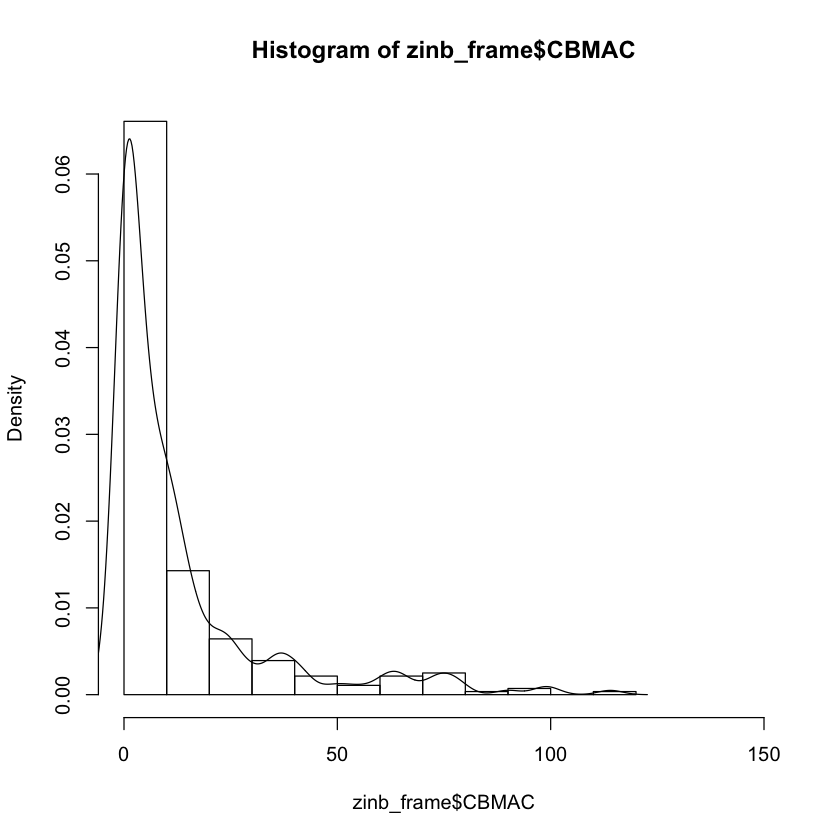

In [7]:
#Plot Histogram
hist(zinb_frame$CBMAC, xlim = c(0,150), probability = TRUE)
lines(density(zinb_frame$CBMAC))

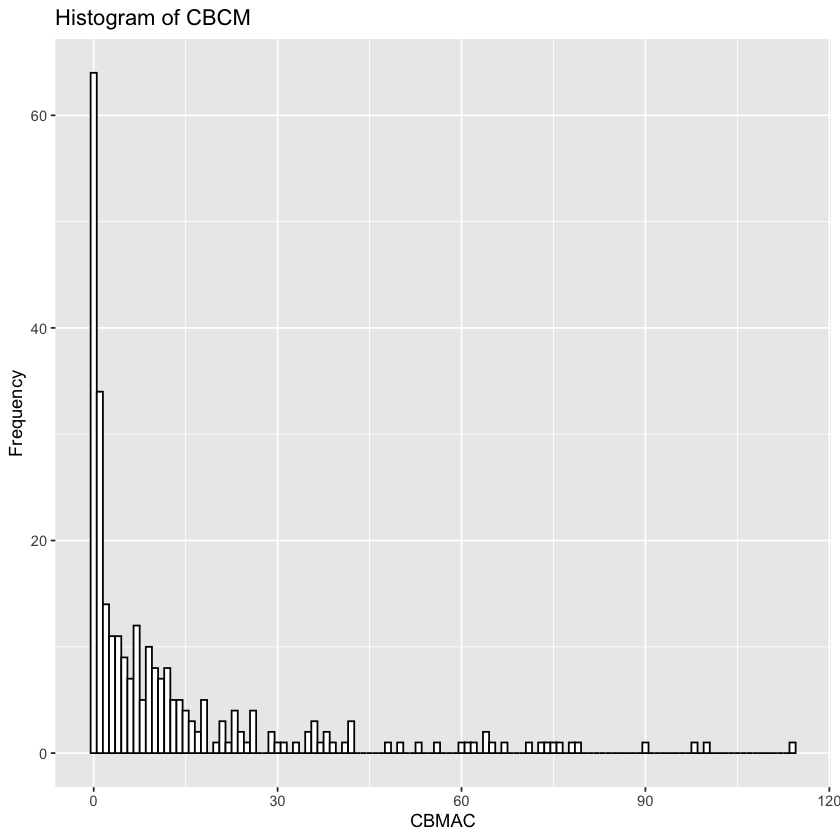

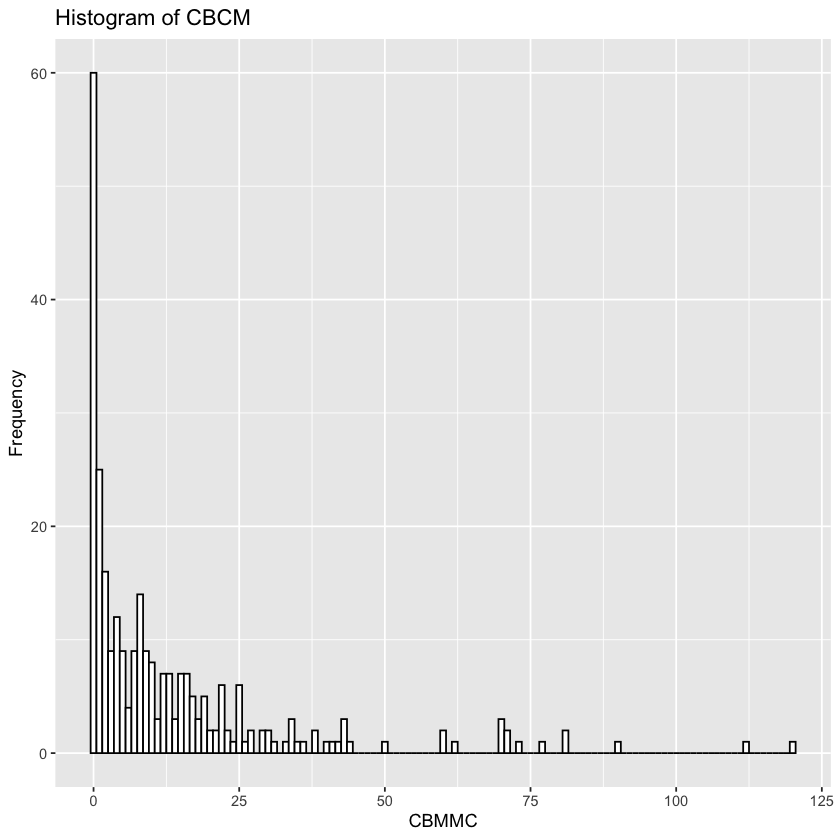

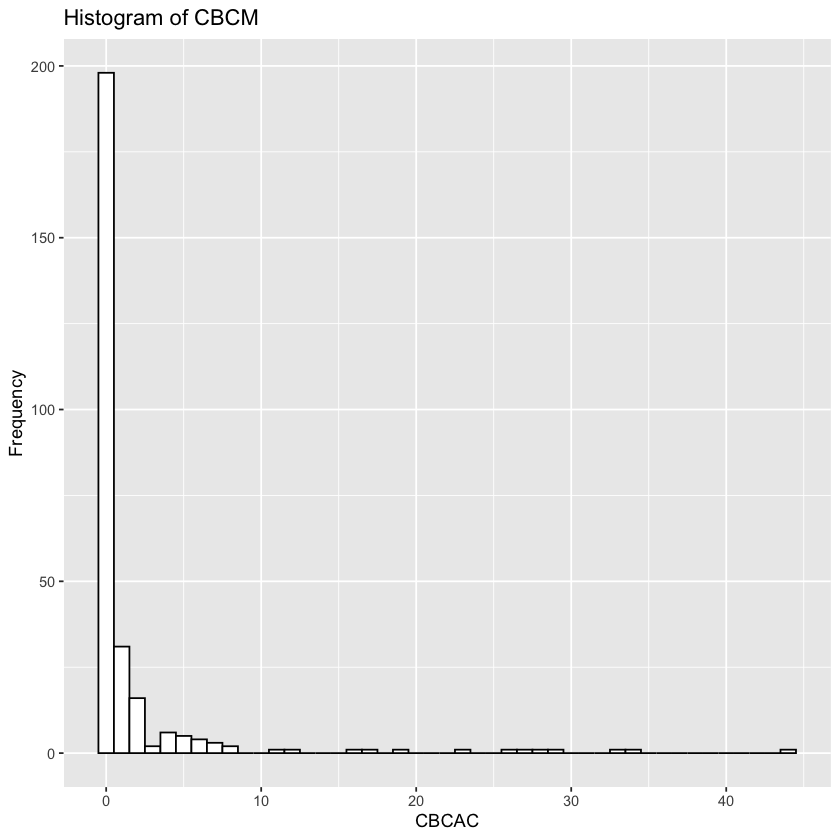

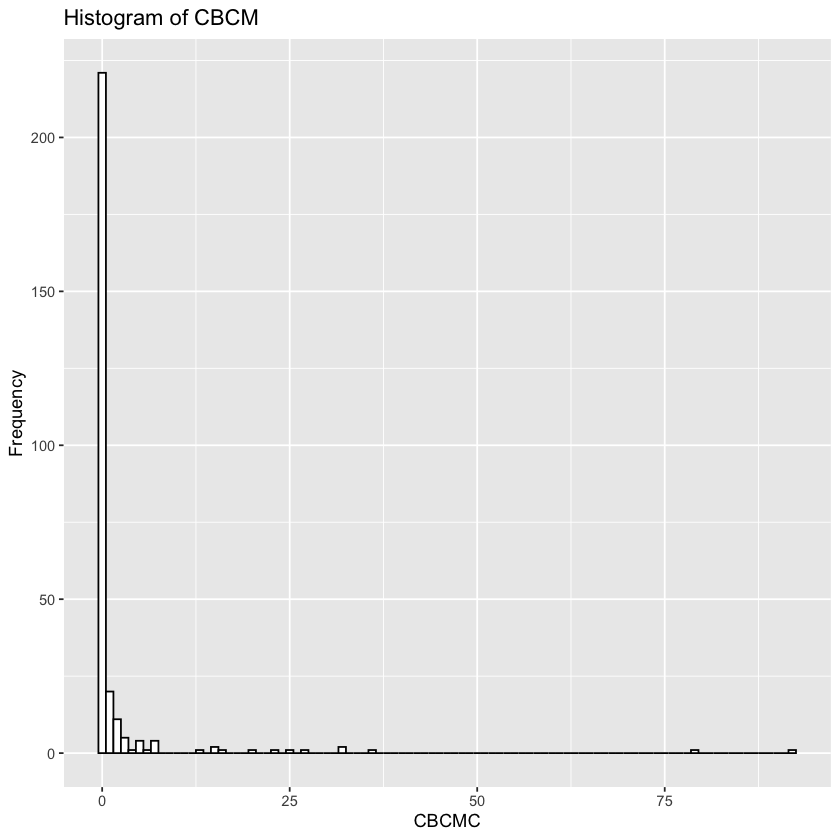

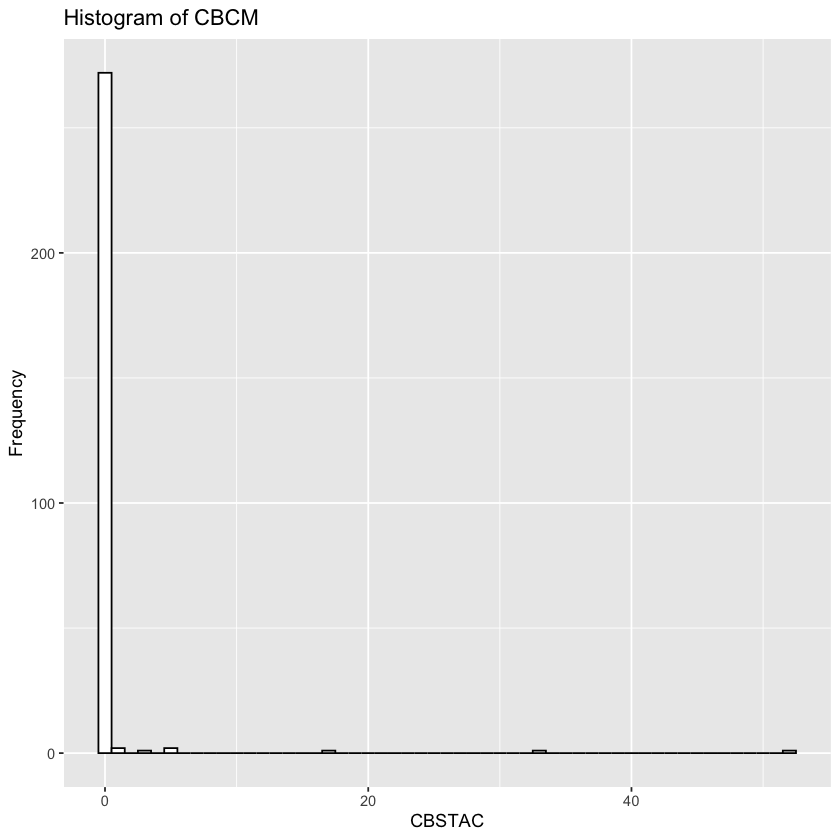

In [8]:
ggplot(zinb_frame, aes(x=CBMAC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBMAC", y= "Frequency", title = "Histogram of CBCM")
ggplot(zinb_frame, aes(x=CBMMC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBMMC", y= "Frequency", title = "Histogram of CBCM")
ggplot(zinb_frame, aes(x=CBCAC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBCAC", y= "Frequency", title = "Histogram of CBCM")
ggplot(zinb_frame, aes(x=CBCMC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBCMC", y= "Frequency", title = "Histogram of CBCM")
ggplot(zinb_frame, aes(x=CBSTAC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBSTAC", y= "Frequency", title = "Histogram of CBCM")

#ggplot(zinb_frame, aes(x=CBMAC)) +
#  geom_density() +

#### Plot Piechart

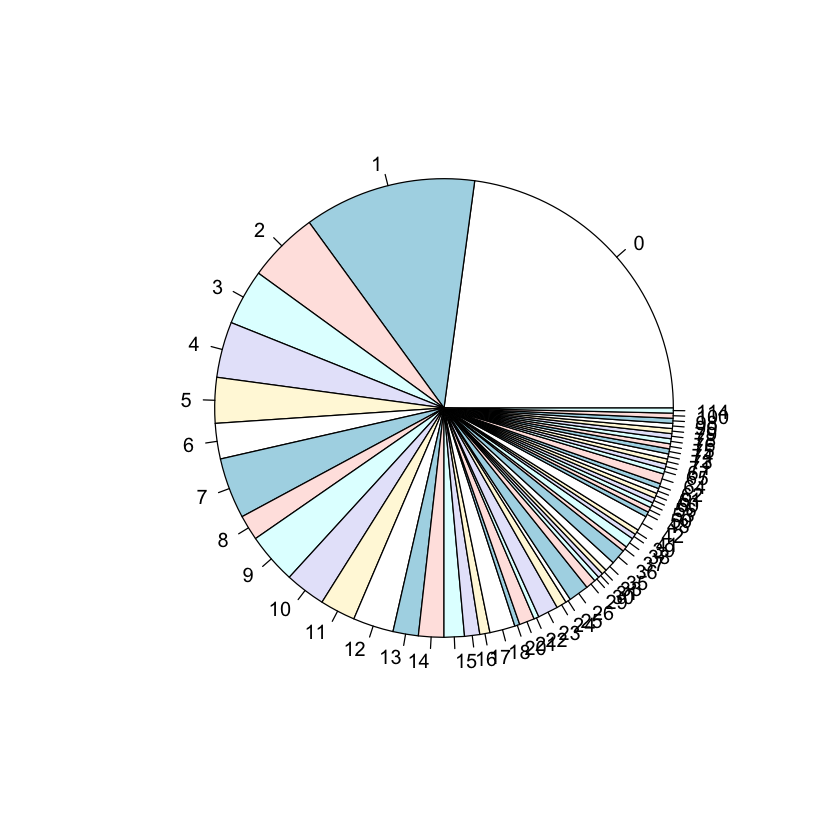

In [9]:
pie(table(zinb_frame$CBMAC))

#### Barplot

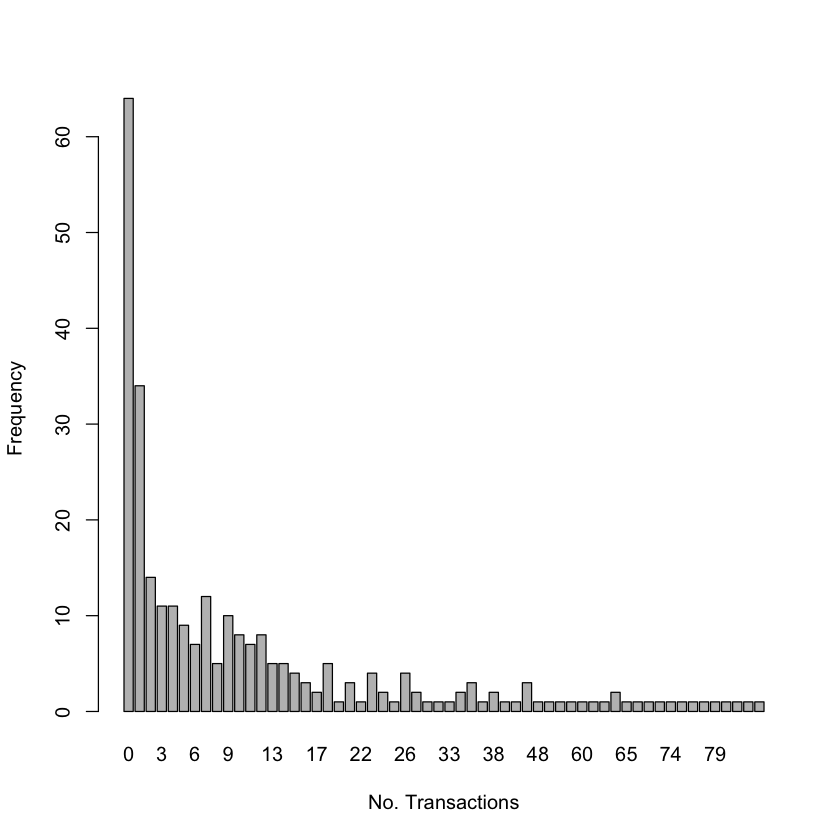

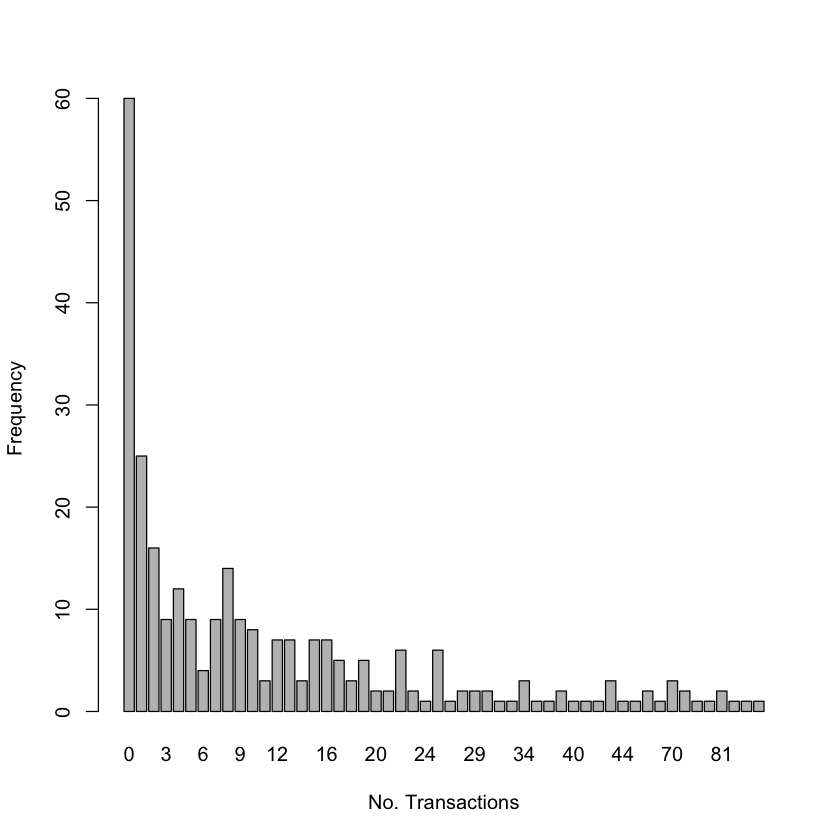

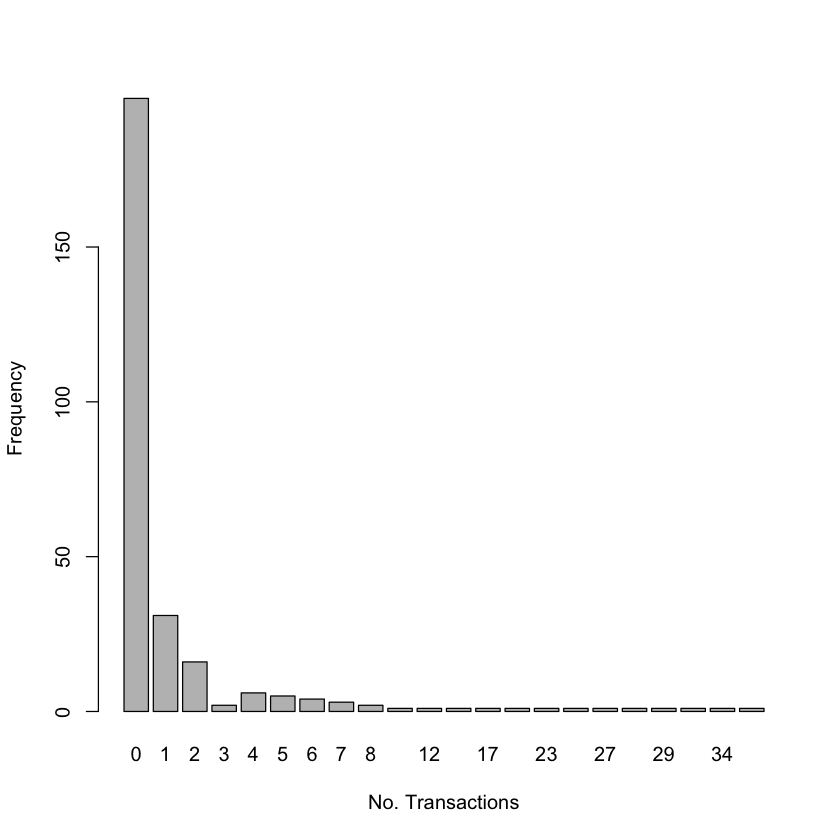

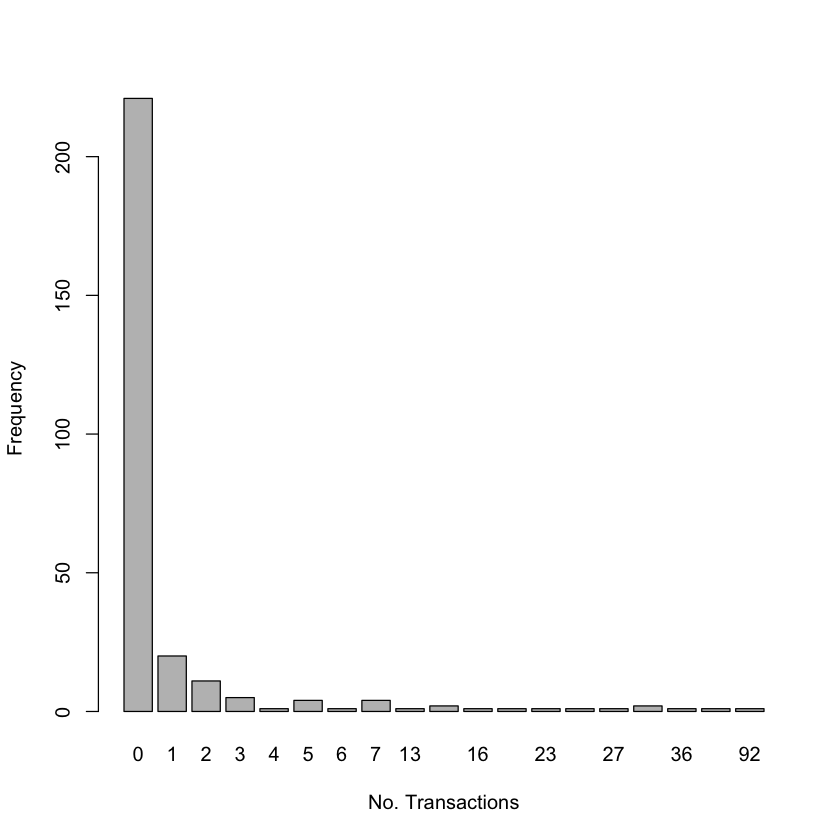

In [10]:
barplot(table(zinb_frame$CBMAC), xlab = "No. Transactions", ylab = "Frequency")
barplot(table(zinb_frame$CBMMC), xlab = "No. Transactions", ylab = "Frequency")
barplot(table(zinb_frame$CBCAC), xlab = "No. Transactions", ylab = "Frequency")
barplot(table(zinb_frame$CBCMC), xlab = "No. Transactions", ylab = "Frequency")

#Grouped Barplot?

#Dotchart
#dotchart(zinb_frame$CBMAC, zinb_frame$Inflation)

#### DESCRIPTIVE STATISTICS

In [11]:
nrow(zinb_frame)
sum(zinb_frame$CBMAC == 0)
sum(zinb_frame$CBMAC != 0)
sum(zinb_frame$CBMAC == 2 & zinb_frame$CBMAC == "Germany")
sum(zinb_frame$CBMMC == 0)
sum(zinb_frame$CBCAC == 0)
sum(zinb_frame$CBCMC == 0)
sum(zinb_frame$CBSTAC == 0)

range(zinb_frame$CBMAC)

skewness(zinb_frame$CBMAC)
#if skewness is positive, it is skewed to the right which is indeed the case in this thesis data

kurtosis(zinb_frame$CBMAC)
kurtosis(zinb_frame$CBMMC)

describe(zinb_frame)

datadensity(zinb_frame)

[1] 280

[1] 64

[1] 216

[1] 0

[1] 60

[1] 198

[1] 221

[1] 272

[1]   0 114

ERROR: Error in skewness(zinb_frame$CBMAC): could not find function "skewness"
